# What Issues Currently Matter to Canadians and their Legislators?

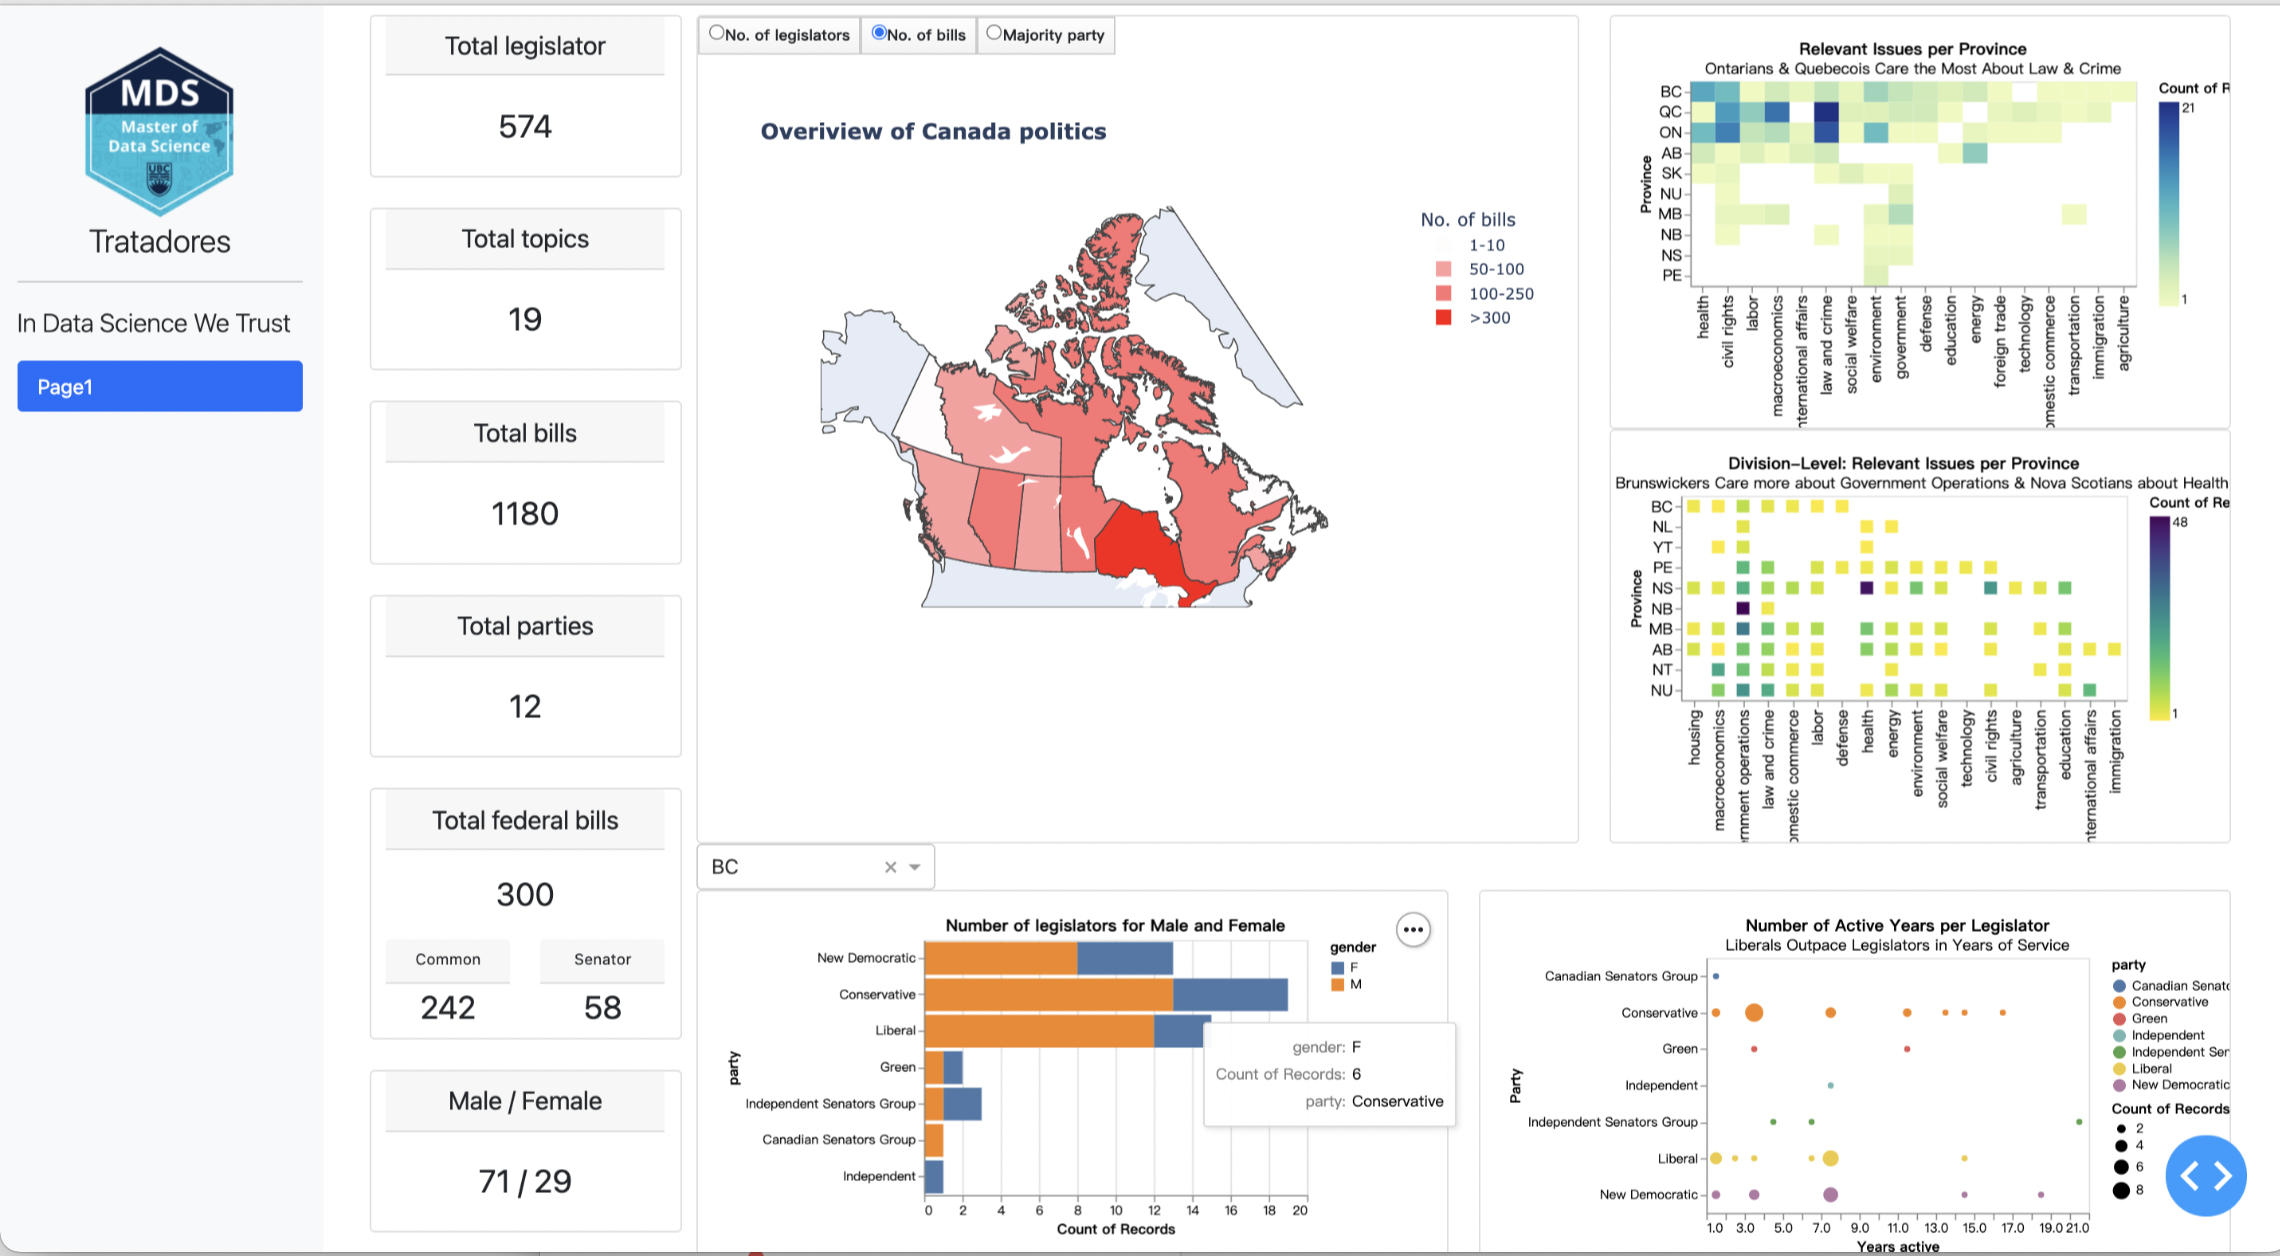

## Introduction  
Legislators are there to legislate, and, given the general state of instability currently facing the world, we want to know what Canadians have been putting forward to their legislators. "Is it the old struggle of labor or of crime?"

## Summary of Findings with Projections
We find that labor does not make the list of top five legislative issues, which makes sense judging from news reports that constantly highlight a shortage of workforce within Canada. Crime does make the cut into our top five legislative issues, which are:  
- **law & crime**
- **health**
- **environments**
- **civil rights**
- **macroeconomics**  

Issues pertaining to civil rights draw our attention as we wonder if this category made the top five due to the recent global protests that have flowed into local protests in Canada involving ***MeToo*** Movement and ***Black Lives Matter***. The former of which includes, for instance, the ongoing Canadian military trial of sexual misconduct. There are other salient issues, such as the civil rights of Indigenous Canadians given the recent findings of the unmarked graves of residential school children, which add to the increase in concern of civil rights amongs Canadaians. Similarly, issues of health and macroeconomics fit within the unease brought on by the ongoing global pandemic.

## Data features:

We have selected the following features for each datasets:


In [13]:
pd.DataFrame({"federal_legislators" : ["name_last", "name_first", "party", "riding", "province_territory", "region", "gender", "years_active", "seniority", "role", "education"], "division_legislators" :["name_last", "name_first", "party", "riding", "province_territory", "region", "gender", "years_active", "seniority", "role", "education"]})

federal_legislators division_legislators
0            name_last            name_last
1           name_first           name_first
2                party                party
3               riding               riding
4   province_territory   province_territory
5               region               region
6               gender               gender
7         years_active         years_active
8            seniority            seniority
9                 role                 role
10           education            education

In [15]:
pd.DataFrame({"federal_legislation" : ["bill_name", "bill_type", "topic", "current_status", "session", "date_introduced", "chamber_origin", "committees", "votes", "bill_text"], "division_legislation" : ["bill_name", "bill_type", "topic", "current_status", "session", "date_introduced", "chamber_origin", "committees", "votes", "bill_text"]
             })

federal_legislation division_legislation
0           bill_name            bill_name
1           bill_type            bill_type
2               topic                topic
3      current_status       current_status
4             session              session
5     date_introduced      date_introduced
6      chamber_origin       chamber_origin
7          committees           committees
8               votes                votes
9           bill_text            bill_text

## Analysis
Our analysis consists of an exploratory data analysis, which is not included in this final report, and the use of various data visualization plots of a comparative nature, which are included here. Features in our focus include legislation at the federal level versus at the province(division)-level, male legislators versus femlaes, and burning issues in legislation.

### Description of the DataSet  

The data was requested from the [Goverlytics API](https://rapidapi.com/ioto-international-ioto-international-default/api/goverlytics/), which includes four resources: division-legislation, division-legislator, federal-legislation, and federal-legislator. We used python to request the json files.



In [4]:
#pip install panel

### Summary of the whole data  

We show the summary of Bills and legislators in the left side of our dashboard. The summary numbers include the total number of legislators (total federal legislators plus total division legislators), the total number of bills (total federal bills plus total division bills), total number of federal bills (number of House of Common, number of Senate), total number of topics, total number of the parties. **(Fig 2 of the left side)**

### Geographical Distribution of Federal legislation

We use the following map of Canada to display the total number of bills, the total number of legislators, and the dominant party in each province. People can zoom in on the map and hover over each province to check these numbers.


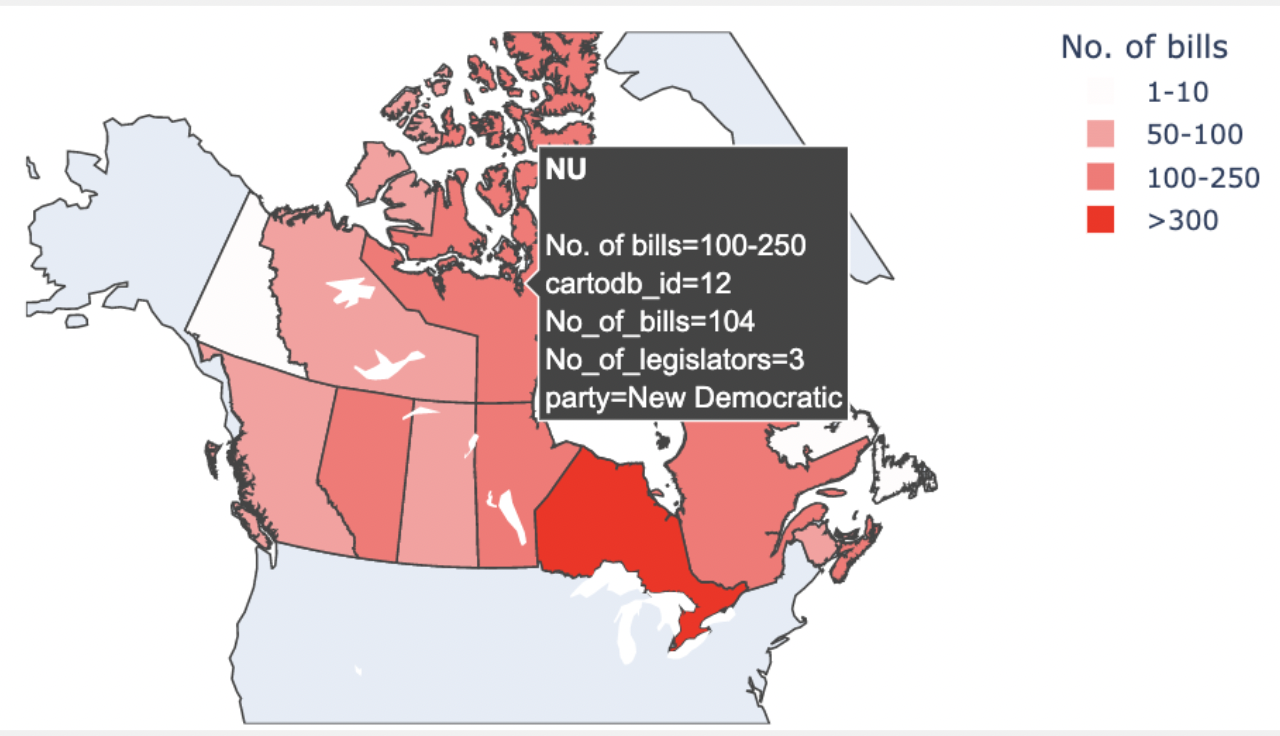

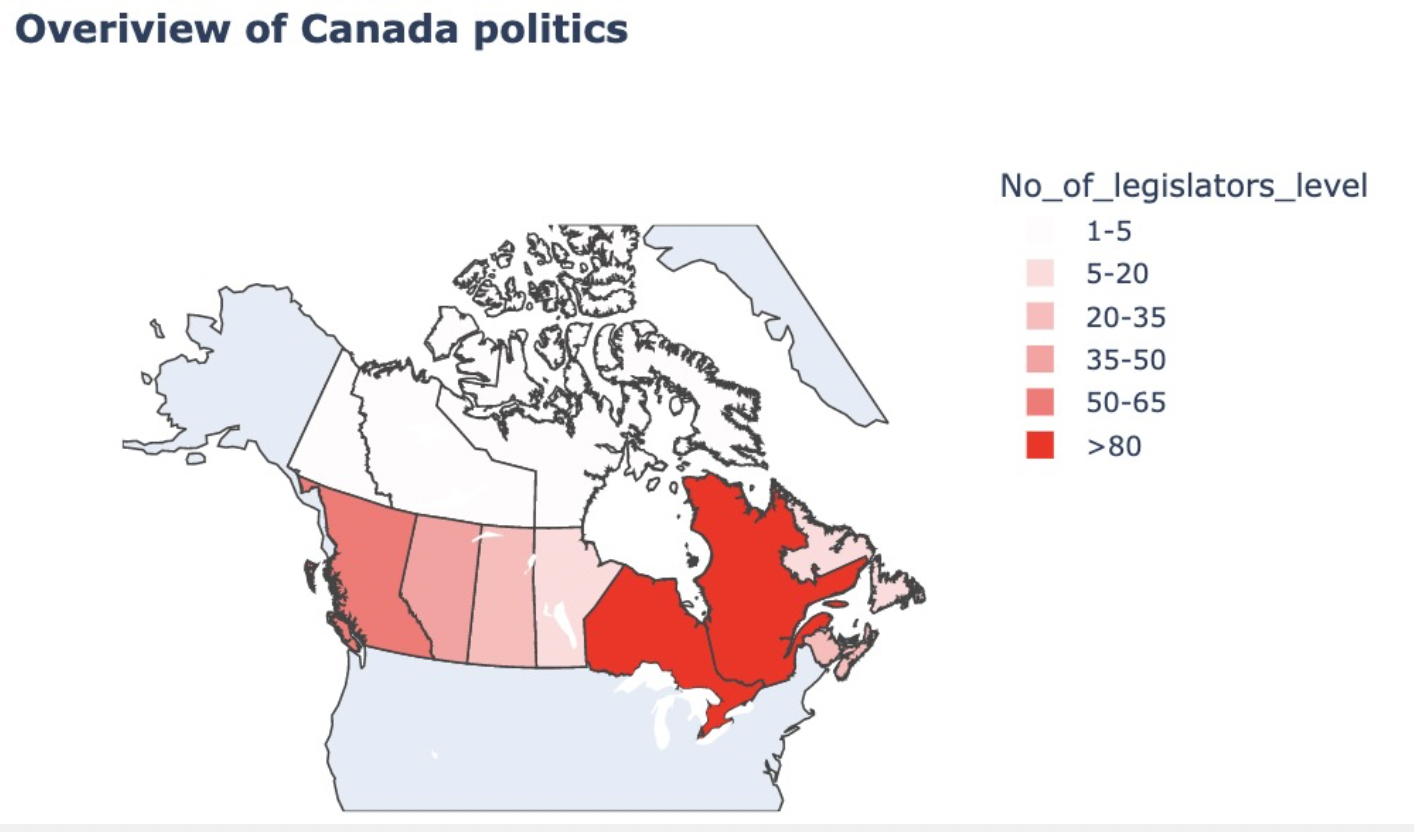

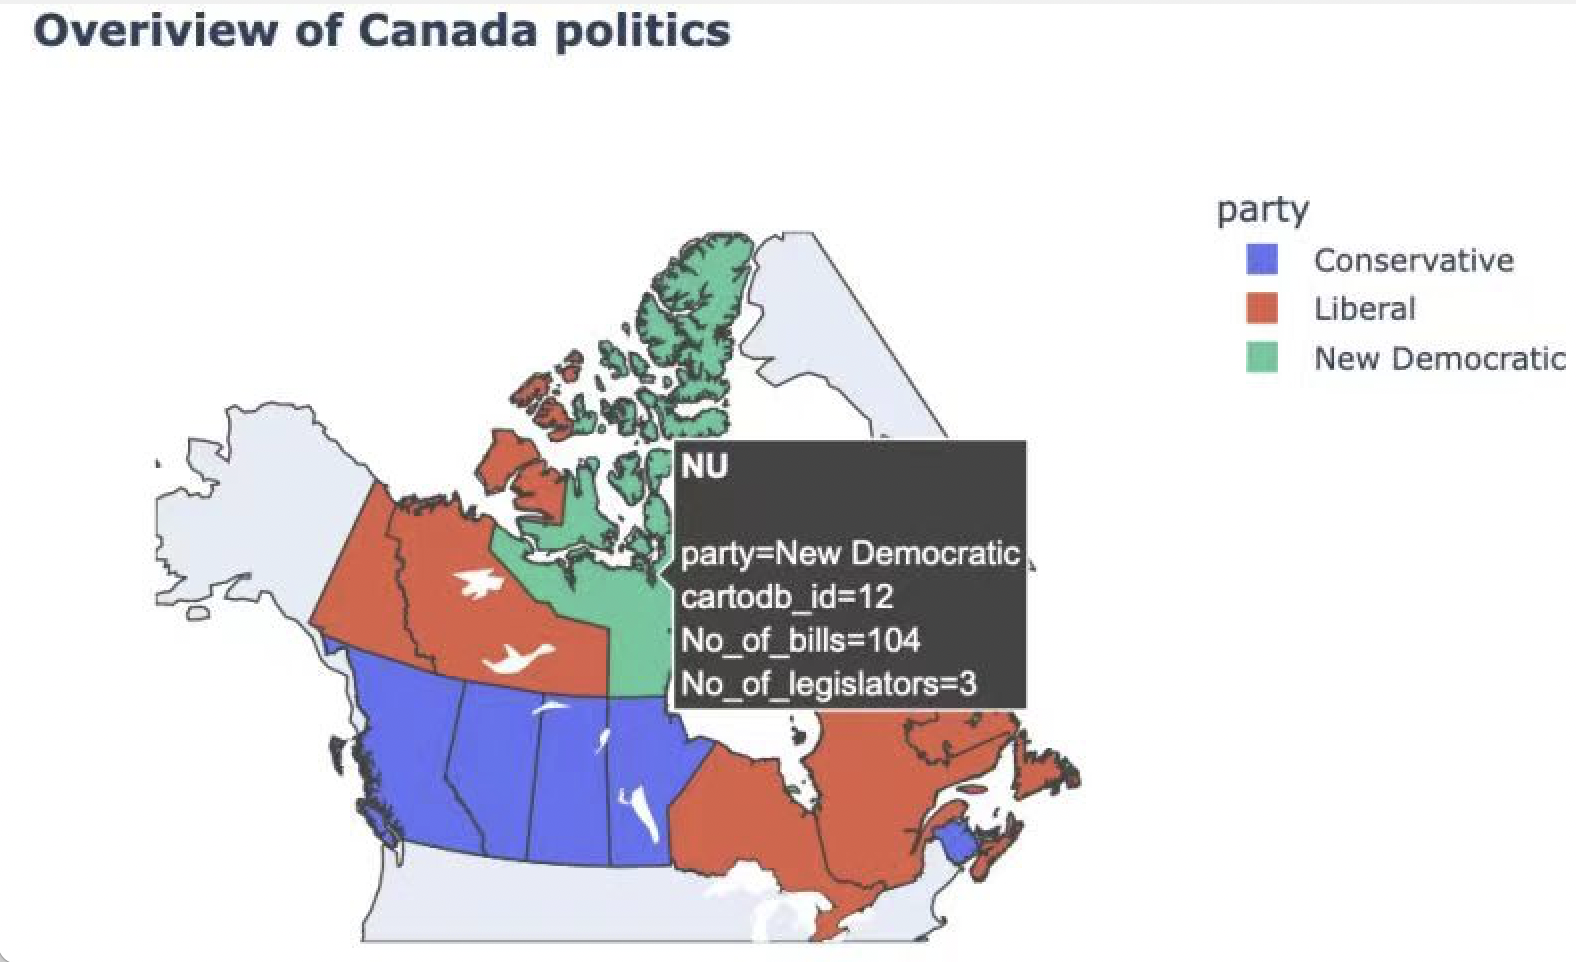

### Federal Level Legislation & Legislators  


We use a bar chart and an area plot to examine:
- the number of years of service of each legislator across the the different parties for all the provinces  
- the dominant party  
- the number of male and female legislative members for each province  

Unsurprisingly, there are fewer female legislators overall, and
- Liberals in Ontario have the most female legislators  
- Liberals in Yukon, Prince Edward Island, Manitoba, and Alberta have no female legislators
- Nova Scotia Conservatives have no female legislators

In [6]:
#Federal-Level Legislators
import pandas as pd
import altair as alt
from panel.interact import interact
import panel as pn
pn.extension('vega')
data_df = pd.read_excel("Federal_legislator_clean.xlsx")
def scatter_plot(province, df=data_df):
    # Plot the sorted and filtered data frame
    data_nna = data_df.loc[:,["province_territory", "gender", "party"]].dropna()
    data_bc = data_nna[data_nna['province_territory'] ==province]
    chart_1 = alt.Chart(data_bc, title = "Number of legislators for Male and Female").mark_bar().encode(
        y = alt.Y("party", sort = "-x"),
        x = alt.X("count()"),
        color = "gender").properties(
        width = 500,
        height = 200)
    
    data_nna = data_df.loc[:,["province_territory", "gender", "party", "years_active"]].dropna()
    data_bc = data_nna[data_nna['province_territory'] ==province]
    party = data_bc.groupby("party").count().sort_values(by = "gender", ascending = False).index[0]
    data_bc = data_bc.query('party == @party')
    
    chart_2 = (alt.Chart(data_bc, title = "Legislators in Dominant Party")
 .transform_density(
     'years_active',
     groupby=['party'],
     as_=['years_active', 'density']).mark_area(interpolate='monotone').encode(
     alt.X('years_active', title = "Years active"),
     alt.Y('density:Q'),
     color='party')).properties(
        width = 500,
        height = 100)
    
    return (chart_1 & chart_2)
interact(scatter_plot, province=data_df['province_territory'].unique().tolist()).embed(max_opts=100)

In [24]:
data_df = pd.read_excel("Federal_legislator_clean.xlsx")
years_active = data_df.loc[:,['years_active', "gender", 'party']].query('years_active != 2012').dropna()

alt.Chart(years_active, title=alt.TitleParams(text="Number of Active Years per Legislator",
        subtitle='Liberals Outpace Legislators in Years of Service')).mark_point(size = 30).encode(
    alt.X("years_active", bin=alt.Bin(maxbins=30), title = "Years active"),
    alt.Y("party", title = "Party"),
    alt.Tooltip("count()"),
    size = "count()",
    fill = "party",
    color = "party"
    
).properties(
    width = 600,
    height = 300
)

alt.Chart(...)

### Federal Legislation: Most Relevant Issues Across the Provinces

Using a heat map, we examine the issues that were most common across the provinces. These include:
- Health for Ontario and Quebec
- Civil Rights for Ontario, Quebec, and British Columbia
- Macroeconomics for Quebec
- Law & Crime for Ontario and Quebec
- Environment for Ontario

In [7]:
#Federal-Level Legislations
Federal = pd.read_excel("Federal_legislation_clean.xlsx")
#data = data.drop('Unnamed', 1)
#Federal.head()


In [8]:
Federal_null = Federal[['province_territory', 'topic']].dropna()
F_new = Federal_null[Federal_null['province_territory']!='None']
#Federal_null
#F_new

In [9]:
import altair as alt
alt.Chart(F_new, title=alt.TitleParams(
        text='Federal: Relevant Issues per Province',
        subtitle='Ontarians & Quebecois Care the Most About Law & Crime')).mark_rect().encode(
    alt.X('topic', sort='y', title = "Topic"),
    alt.Y('province_territory', title = "Province", sort = 'x'),
    alt.Tooltip('count()'),
    color = 'count()',
)

alt.Chart(...)

### Legislation across Division: Most Relevant Issues

Using another heat map with circular representation, we examine the issues that are most common across the divisions. These include:

- Government Operations for New Brunswick, Nunavut, and Manitoba
- Health for Nova Scotia
- Government Operations for Northwest Territories
- Civil Rights in Nova Scotia

In [17]:
#Division-Level Legislation
div_leg = pd.read_excel("Division-legislation.xlsx")
#div_leg.head()

div_leg_new = div_leg[["province_territory", "topic"]].dropna()
div_leg_new

alt.Chart(div_leg_new, title=alt.TitleParams(
        text='Division-Level: Relevant Issues per Division',
        subtitle='New Brunswickers Care more about Government Operations & Nova Scotians about Health')).mark_point(size=100).encode(
    alt.X('topic', sort='y', title = "Topic"),
    alt.Y('province_territory', title = "Division", sort = 'x'),
    alt.Tooltip('count()'),
    alt.Color('count()', scale=alt.Scale(scheme='viridis', reverse=True))
).properties(width=500).configure_axis(
    labelFontSize=12,                                                 # Change the font size of the axis labels (the numbers)                                                  # Change the font size of the axis title                                                  # Change the font size of the legend title                                                      # Change the font size of the chart title
)

alt.Chart(...)

### Legislators: Gender Distribution at the Division and Federal Level 

Using a pie chart, we look at the distribution of gender at the different levels of legislation. We find that:
- 29.1% Female vs 70.9% Male Legislators at the Division Level
- 35.3% Female vs 64.7% Male Legislators at the Federal Level

These numbers may be higher than in the past; however, there is still room for improvement.

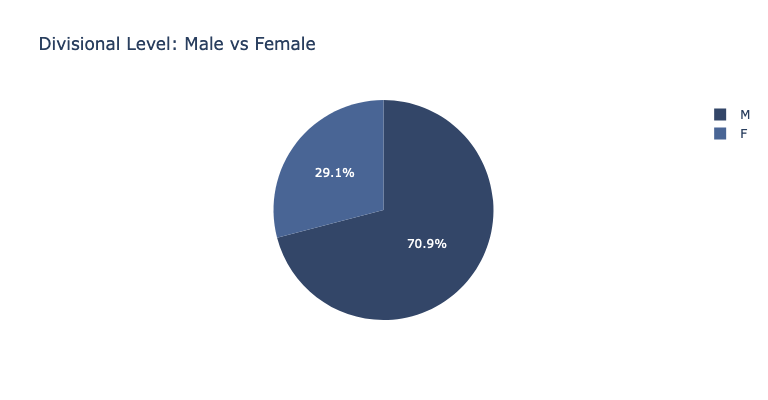

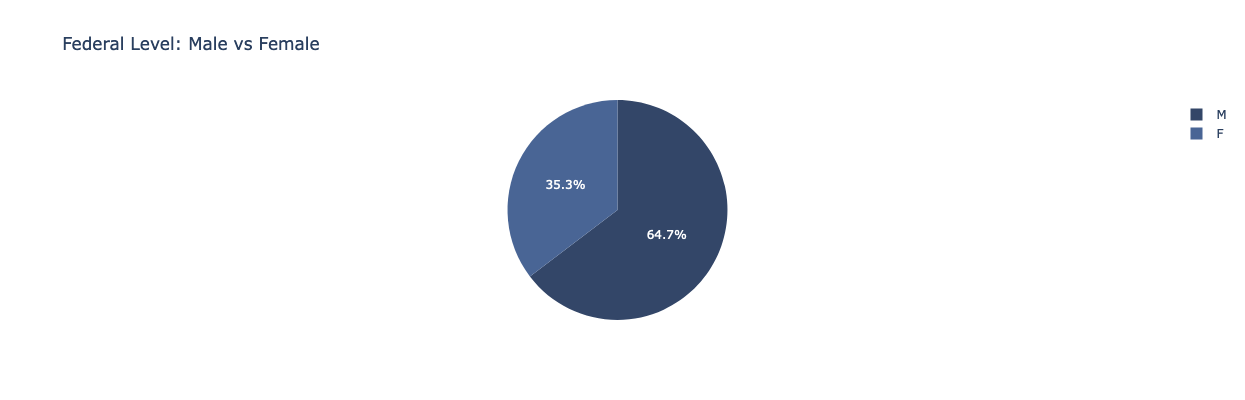

In [23]:
#Federal-Level Gender
import plotly.express as px
import pandas as pd
D_Legislator=pd.read_excel("Division_legislator_clean.xlsx")
fig_pie = px.pie(D_Legislator[D_Legislator["gender"].notna()], names="gender", height=400, width=600, title='Divisional Level: Male vs Female', 
                 color_discrete_sequence=['#334668','#496595'])
fig_pie.show()

F_Legislator=pd.read_excel("Federal_legislator_clean.xlsx")
fig_pie = px.pie(F_Legislator[F_Legislator["gender"].notna()], names="gender", height=400, width=600, title='Federal Level: Male vs Female', 
                 color_discrete_sequence=['#334668','#496595'])
fig_pie.show()

### Example of Additional Visualization: Votes on Social Welfare

The bar chart below illustrates another visualization that we can do. It displays the votes on a bill pertaining to social welfare. For this we see that Liberals voted overwhelmingly against this specific bill, and Conservatives are in favor. A key observation here is that most of the parties are against this bill except for the Conservative party.

In [12]:
F_Legistlation=pd.read_excel('federal-legislation.xlsx')
prac = F_Legistlation["votes"].values[8]

prac_vo = eval(prac)["votes"]
new_df=pd.DataFrame(prac_vo)
df=new_df.merge(F_Legislator, how='left', on='goverlytics_id')

import altair as alt
alt.Chart(df).mark_bar().encode(
 x = alt.X("party"),
y = "count()",
color="vote_text")

In [28]:
F_Legistlation=pd.read_excel('federal-legislation.xlsx')
prac = F_Legistlation["votes"].values[8]

prac_vo = eval(prac)["votes"]
new_df=pd.DataFrame(prac_vo)
new_df


vote_text       legislator  goverlytics_id
0         yea   Ziad Aboultaif         39703.0
1         yea  Scott Aitchison         39704.0
2         yea        Dan Albas         39705.0
3         nay    Omar Alghabra         39706.0
4         yea   Leona Alleslev         39707.0
..        ...              ...             ...
322       yea    David Yurdiga         40688.0
323       nay      Salma Zahid         40689.0
324       nay      Lenore Zann         40690.0
325       yea       Bob Zimmer         40691.0
326       nay    Sameer Zuberi         40692.0

[327 rows x 3 columns]

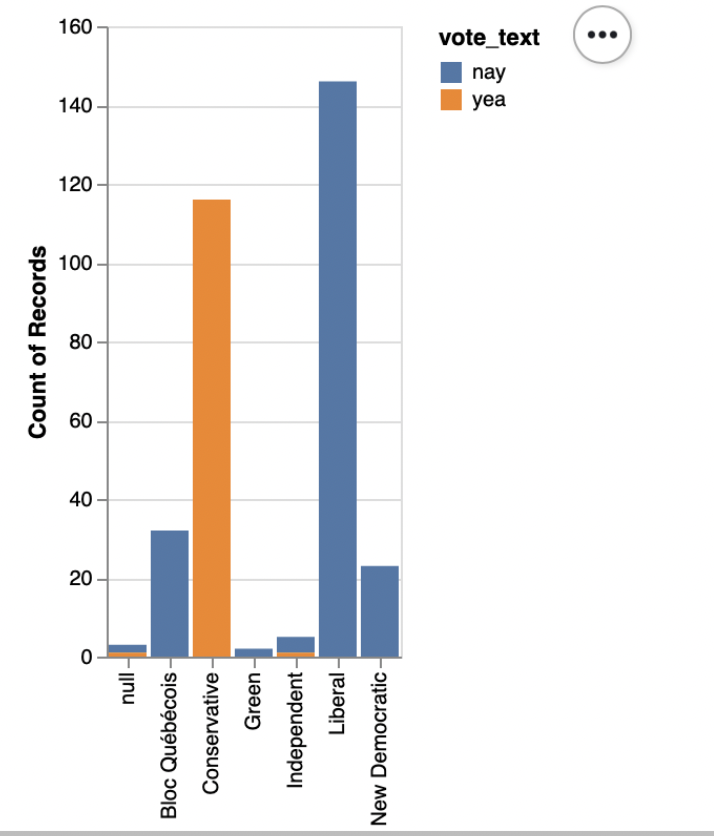

### Appendix

#### Short video link (Youtube)

#### Github repository

https://github.com/PANDASANG1231/BIRS_CIH_dashboard